In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("directory_to_the_csv_file", index_col=0)

In [ ]:
df.iloc[0:5,0:5]

,AAK1,AASS,AATK,ABAT,ABCA1
GSM338860,6.170397,5.606532,8.186989,7.100655,4.965535
GSM338861,6.112532,5.407005,8.530366,7.131207,4.912667
GSM338863,6.164055,5.518116,7.642412,7.221282,4.962869
GSM338865,6.423721,5.650853,8.372038,7.381892,4.956469
GSM338866,6.631895,5.701830,7.903833,7.641011,4.991327


### Split df to X and Class to y

In [ ]:
# Separate features and target
X = df.drop(columns = ['Class'])
y = df['Class']

## Feature Selection: Mutual Information

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Initialize a Logistic Regression classifier with L1 regularization
log_reg = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model to the data
log_reg.fit(X, y)

# Use SelectFromModel to select features based on the L1 regularization
model = SelectFromModel(log_reg, prefit=True)

# Get the selected features
l1_selected_features = X.columns[model.get_support()]
X_l1_selected = X[l1_selected_features]

# Print the selected feature names
for feature in l1_selected_features:
    print(feature)

# Assign the L1-selected features to X_selected
X_selected = X_l1_selected


ACADM
ADAMTS1
ADAR
ADRA1B
AGPAT5
AIF1
AKAP12
ALDH1A1
ALG2
AMPD3
ANGPT1
APLNR
APOBEC1
APOD
AQP3
ARC
ARHGAP24
ARL4D
ARRDC4
ASPA
ATF3
ATP13A1
ATP1B2
ATP7A
AURKB
AVP
B2M
BAG2
BAG3
BAMBI
BCAT1
BCL11B
BDKRB1
BEX2
BEX4
BIRC2
BLCAP
BST2
C1QA
C1QB
C1QC
C3AR1
CALB1
CALB2
CALCR
CAMKK2
CAMKV
CAPG
CARTPT
CASQ2
CAT
CBFB
CBR3
CCL7
CCND1
CCNG2
CCR5
CD180
CD200
CD44
CD47
CD52
CD53
CD55
CDC25B
CDC42EP3
CDH15
CDKN2C
CEBPB
CENPE
CENPK
CENPN
CENPQ
CHEK1
CHGA
CHRNA5
CIDEB
CITED2
CKB
CKS1B
CLDN10
CLDN11
CLSTN2
CLU
CNIH4
COCH
COL11A2
COL19A1
COL1A2
COX18
CP
CPT1A
CRTAC1
CRYAB
CRYM
CSDC2
CTSE
CTSF
CTTNBP2NL
CXCL10
CXCL9
CXCR4
CYB5R3
CYP27A1
DAXX
DBNDD1
DCK
DCN
DCTN1
DDC
DDIT3
DDIT4
DDX21
DLK2
DLX5
DNAJB1
DNAJC9
DSN1
DUSP2
DYM
EFEMP1
EFNB3
EGR4
EIF2B1
EIF4E3
ELAVL4
ELOVL6
EMCN
EN2
ENC1
EPHX2
EPSTI1
ERMP1
ETV5
FABP7
FEZF2
FGL2
FKBP10
FMOD
FN1
FOSL2
FOXG1
FOXM1
FOXQ1
FRMD6
FST
FUCA1
FXYD6
G3BP2
GABARAP
GABRA3
GABRD
GAL
GAP43
GATA2
GBP2
GDA
GEM
GFAP
GJB2
GNA11
GNG3
GNPAT
GPD1
GPNMB
GPX1
GREM1
GRP
GSTM2
GSTO1
GZMA


### 80/20 Rule

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Baseline Model

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
# Initial SVM
svm_model = SVC(kernel='rbf', C=1.0)  # You can choose 'linear', 'poly', 'rbf', etc. for the kernel
svm_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.6986301369863014
Train Accuracy: 0.8235294117647058


## Confusion Matrix

In [ ]:
unique_labels = y.unique()
print(unique_labels)

['OPNA' 'TBI' 'EEV']


In [ ]:
# Define the class names based on the identified mapping
class_names = ['OPNA', 'TBI', 'EEV']

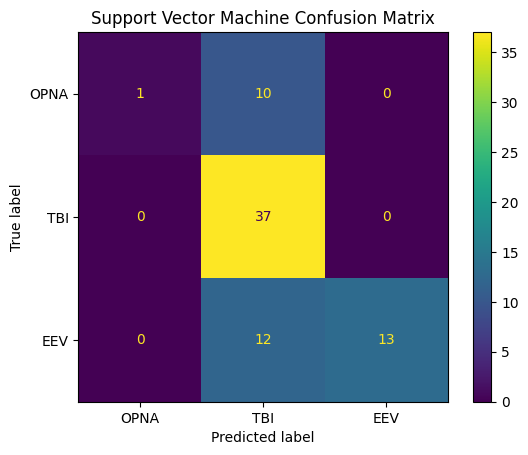

In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.viridis)  # You can change the colormap if you prefer
plt.title("Support Vector Machine Confusion Matrix")
plt.show()